In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import struct
from matplotlib import pyplot


# for evaluation metrics
from sklearn.metrics import accuracy_score, f1_score


# set random seed
np.random.seed(0)
random.seed(0)

This notebook impletents stochastic gradient descent (SDG) as well as SGD with momentum. MNIST dataset is used.

The MNIST database contains the dataset for this problem. Develop an image recognition algorithm using logistic regression based on gradient descent that can correctly classify handwritten images as 4 or not 4

## Load dataset
MNIST data can be downloaded from  http://yann.lecun.com/exdb/mnist/.

The training set contains 60000 images
The shape of the image is (28, 28)
The label of the image is 3


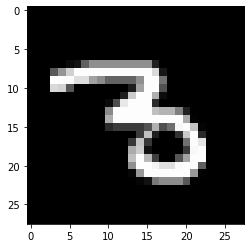

In [2]:
# load MNIST
path = '../MNIST/'   # the training set is stored in this directory

# Train data
fname_train_images = os.path.join(path, 'train-images-idx3-ubyte')  # the training set image file path
fname_train_labels = os.path.join(path, 'train-labels-idx1-ubyte')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_train_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    train_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_train_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
    
print('The training set contains', len(train_images), 'images')  # print the how many images contained in the training set
print('The shape of the image is', train_images[0].shape)  # print the shape of the image


imgNumber = 30  # choose which image you want to display
print('The label of the image is', train_labels[imgNumber])  # print the label of the image displayed

pyplot.imshow(train_images[imgNumber], cmap='gray')  # plot the image in "gray" colormap
pyplot.show()

In [3]:
# load test set

fname_test_images = os.path.join(path, 't10k-images-idx3-ubyte')  # the training set image file path
fname_test_labels = os.path.join(path, 't10k-labels-idx1-ubyte 2')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_test_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    test_y = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_test_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    test_X = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_y), rows, cols)
    
print('The training set contains', len(test_X), 'images')  # print the how many images contained in the training set
print('The shape of the image is', test_X[0].shape)  # print the shape of the image

The training set contains 10000 images
The shape of the image is (28, 28)


## Preprocessing

Flatten. Typically, pictures are reshaped to column vectors. The images in the dataset are of size (28,28)
 and should be reshaped to column vectors of size (28x28,1).

In [4]:
train_X = np.reshape(train_images, (train_images.shape[0], -1))
train_X = train_X.T
# set y as boolean: 4 or not 4
train_y = train_labels == 4

# preprocess test set
test_X = np.reshape(test_X, (test_X.shape[0], -1))
test_X = test_X.T
test_X.shape
test_y = test_y == 4

print("training set shape:", train_X.shape, "; total number of traing samples:", len(train_y))
print("total number of traing samples:", len(test_y))

training set shape: (784, 60000) ; total number of traing samples: 60000
total number of traing samples: 10000


For scaling of picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [5]:
train_X = train_X / 255
test_X = test_X / 255

## Neural Network model

forward prop: 
$$ z^{[1]} = W^{[1]} X + b^{[1]} \\
a^{[1]} = g^{[1]}(z^{[1]}) \\$$
$$z^{[l]} = W^{[l]} a^{[1-1]} + b^{[l]} \\ 
a^{[l]} = g(z^{[l]}) $$
last layer:
$$A^{[L]} = sigma(z^{[L]}) = \frac{1}{1 + e^{-(W^{[L]} a^{[L-1]} + b^{[L]})}} $$
 where $g(\cdot)$ is non-linear activation function such as Relu( ) or tanh( ).
 
Loss function:
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{[L](i)})+(1-y^{(i)})\log(1-a^{[L](i)})$$


In [6]:
# load neural net model
from importlib import reload
import model
reload(model)

from model import deep_feedforward_network

## Minibatch SGD

    • Train a 3-layer neural network to classify the data using minibatch SGD.
    • Use 2 hidden layers with 20 and 10 units respectively
    • Use ReLU in the hidden layers and sigmoid in the output layer.
    • Plot the learning curve (cost function vs. number of iterations).
    • Compute the training and test error.
    • Investigate the impact of the minibatch size.

In [7]:
def train(epoch, verbal = True):
    costs = np.zeros(n_iter)
    # permute the sample index
    shuffled_ind = np.random.permutation(len(train_y))
#     print("first 5 ind after shuffle, ", shuffled_ind[:5])
    batch_i = 0 # index of mini batch
    for batch_i in range(n_iter):
        # take account that the last batch might have samples less than batch size 
        end_ind = min(len(train_y) - 1, (batch_i + 1)*batch_size)
        train_Xs = train_X[:, shuffled_ind[batch_i*batch_size : end_ind]]
        train_ys = train_y[shuffled_ind[batch_i*batch_size : end_ind]]
        batch_cost = NN.fit(train_Xs, train_ys)
        costs[batch_i] = batch_cost

        if batch_i % 500 == 0 and verbal:        
            print("Epoch %i. Cost at iteration %i : %f" %(epoch, batch_i, batch_cost))

        batch_i += batch_size
    return costs

In [8]:
NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], step_size = 0.01, drop_out= 0, l2_reg= 0)

In [9]:
max_epoch = 30
batch_size = 64
n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
all_costs = np.zeros((max_epoch, n_iter))

for epoch in range(max_epoch):
    if epoch % 25 == 0:
        verbal = True
    else:
        verbal = False
    all_costs[epoch] = train(epoch, verbal)

Epoch 0. Cost at iteration 0 : 0.690087
Epoch 0. Cost at iteration 500 : 0.412455
Epoch 25. Cost at iteration 0 : 0.035582
Epoch 25. Cost at iteration 500 : 0.135152


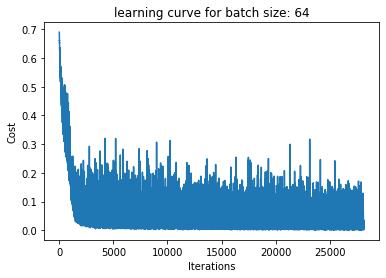

In [11]:
def plot_curve(all_cost, batch_size):
    all_cost = all_cost.flatten()
    plt.plot(all_cost)
    plt.ylabel('Cost')
    plt.xlabel('Iterations')
    plt.title('learning curve for batch size: ' + str(batch_size))
    plt.show()

plot_curve(all_costs, batch_size)


We can see from the learning curve that the learning cost has many randomness. This is caused by randomly sampled mini batches. But overall the cost is decreasing. And the computation for each iteration is significantly faster than batch method.

In [12]:
NN.evaluate(train_X, train_y,test_X, test_y)

Training accuracy: 0.993   F1 score: 0.964
Testing accuracy: 0.991    F1 score: 0.954


The result shows that stochastic gradient descent works well. With only 50 epoch it is reaching high tesing accuracy.

In [21]:
NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], step_size = 0.01, drop_out= 0, l2_reg= 0)
max_epoch = 30
batch_size = 256
n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
all_costs = np.zeros((max_epoch, n_iter))

for epoch in range(max_epoch):
    if epoch % 25 == 0:
        verbal = True
    else:
        verbal = False
    all_costs[epoch] = train(epoch, verbal)
NN.evaluate(train_X, train_y,test_X, test_y)

Epoch 0. Cost at iteration 0 : 0.905120
Epoch 25. Cost at iteration 0 : 0.046175
Training accuracy: 0.984   F1 score: 0.915
Testing accuracy: 0.983    F1 score: 0.914


### Infulence of size of minibatch size

Using mini batch size 64, training took 46.95 seconds
Training accuracy: 0.996   F1 score: 0.980
Testing accuracy: 0.993    F1 score: 0.965


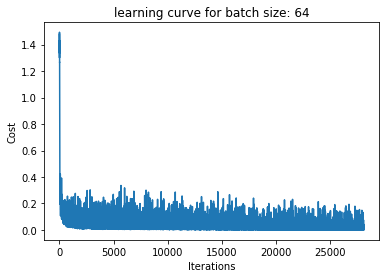

---------------
Using mini batch size 256, training took 26.06 seconds
Training accuracy: 0.985   F1 score: 0.923
Testing accuracy: 0.984    F1 score: 0.916


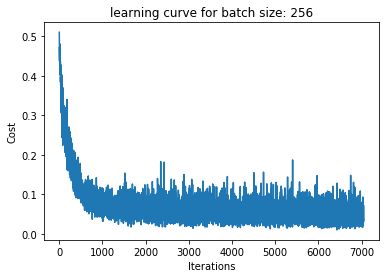

---------------
Using mini batch size 512, training took 21.60 seconds
Training accuracy: 0.981   F1 score: 0.902
Testing accuracy: 0.981    F1 score: 0.900


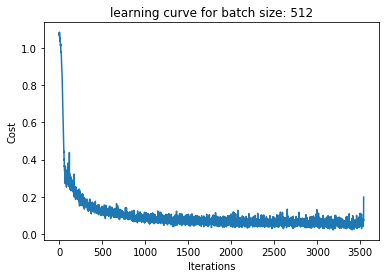

---------------


In [24]:
import time
for batch_size in [64, 256, 512]:
    # time the training process
    tic = time.clock()
    NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], step_size = 0.01, drop_out= 0, l2_reg= 0)
    max_epoch = 30
    n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
    all_costs = np.zeros((max_epoch, n_iter))
    
    for epoch in range(max_epoch):
        all_costs[epoch] = train(epoch, verbal = False)
        
    fitT = time.clock() - tic
    print("Using mini batch size %i, training took %.2f seconds" %(batch_size, fitT))
    # evaluate
    NN.evaluate(train_X, train_y,test_X, test_y)
    plot_curve(all_costs, batch_size)
    print('---------------')

We can see that as mini batch size increases, the variantion in the cost deceases. This is because for each iteration, more samples provide a more accurate estimation of the gradient, and the sample cost is more averaged out to be close to the true value. 

The outcome shows that for the same number of epoches, smaller batch size takes more time. This is because it takes mroe iterations within an epoch to loop though all examples. So that there will be more iterations for smaller batches. The accuracy score shows that a smaller mini batch size (64) works better than larger batch size. This is also possibly because more iterations are allowed to update parameter.

This shows that rather than computing an exact gradient for each update, updating for more iterations with a less accurate estiamtion of gradient is better -- which is the phylisopy behind stochastic gradient descent.

## Minibatch SGD with Momentum
all other setups are the same, except that minibatch SGD with momentum is used for updates.


In [41]:
# load neural net model
from importlib import reload
import model
reload(model)

from model import deep_feedforward_network

In [33]:
NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], step_size = 0.01, drop_out= 0, l2_reg= 0, momentum = True, beta = 0.9)

In [34]:
max_epoch = 30
batch_size = 64
n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
all_costs = np.zeros((max_epoch, n_iter))

for epoch in range(max_epoch):
    if epoch % 25 == 0:
        verbal = True
    else:
        verbal = False
    all_costs[epoch] = train(epoch, verbal)

Epoch 0. Cost at iteration 0 : 0.645485
Epoch 0. Cost at iteration 500 : 0.114135
Epoch 25. Cost at iteration 0 : 0.003613
Epoch 25. Cost at iteration 500 : 0.001444


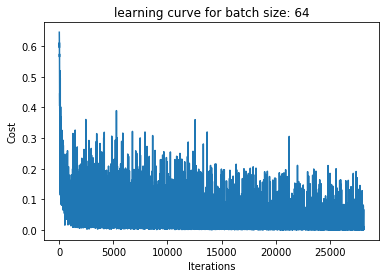

In [35]:
plot_curve(all_costs, batch_size)

In [38]:
NN.evaluate(train_X, train_y,test_X, test_y)

Training accuracy: 0.996   F1 score: 0.978
Testing accuracy: 0.992    F1 score: 0.961


### Investigate the impact of the momentum parameter.

Using momentum parameter beta = 0.90, training took 46.91 seconds
Training accuracy: 0.994   F1 score: 0.969
Testing accuracy: 0.992    F1 score: 0.958


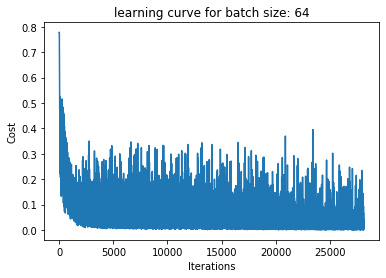

---------------
Using momentum parameter beta = 0.60, training took 48.42 seconds
Training accuracy: 0.996   F1 score: 0.978
Testing accuracy: 0.992    F1 score: 0.958


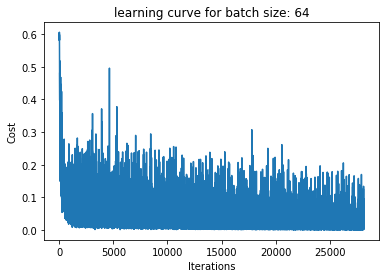

---------------
Using momentum parameter beta = 0.30, training took 49.02 seconds
Training accuracy: 0.903   F1 score: 0.000
Testing accuracy: 0.902    F1 score: 0.000


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


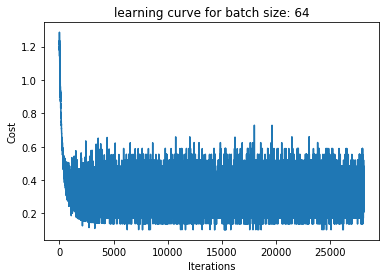

---------------


In [43]:
import time
for beta in [ 0.9, 0.6, 0.3]:
    # time the training process
    tic = time.clock()
    NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], step_size = 0.01, drop_out= 0, l2_reg= 0, momentum = True, beta = beta)
    batch_size = 64
    max_epoch = 30
    n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
    all_costs = np.zeros((max_epoch, n_iter))
    
    for epoch in range(max_epoch):
        all_costs[epoch] = train(epoch, verbal = False)
        
    fitT = time.clock() - tic
    print("Using momentum parameter beta = %.2f, training took %.2f seconds" %(beta, fitT))
    # evaluate
    NN.evaluate(train_X, train_y,test_X, test_y)
    plot_curve(all_costs, batch_size)
    print('---------------')

We can see that the learning curve still has large variance because of mini batch stochastic gradient descent. A larger beta, meaning less update for each gradient estimation, works better. In the extreme case, beta = 0 is the normal stocastic gradient descent. Here a small beta (0.3) actually leads to diverge, and the model fails to learn.

### Investigate the influece of update step size

Using step size = 1.000, training took 79.12 seconds
Training accuracy: 0.903   F1 score: 0.000
Testing accuracy: 0.902    F1 score: 0.000


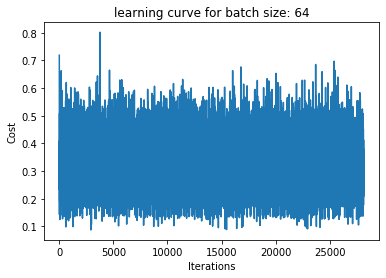

---------------
Using step size = 0.100, training took 51.32 seconds
Training accuracy: 1.000   F1 score: 1.000
Testing accuracy: 0.995    F1 score: 0.972


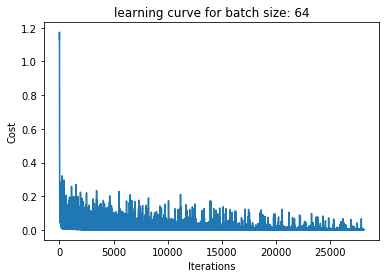

---------------
Using step size = 0.010, training took 50.83 seconds
Training accuracy: 0.994   F1 score: 0.967
Testing accuracy: 0.991    F1 score: 0.955


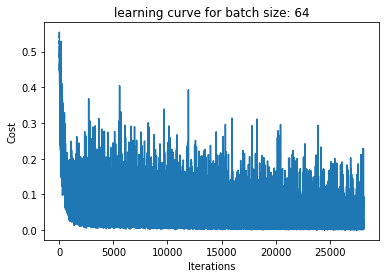

---------------


In [50]:
import time
for step_size in [ 1, 0.1, 0.01]:
    # time the training process
    tic = time.clock()
    beta = 0.9
    NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], step_size = step_size, drop_out= 0, l2_reg= 0, momentum = True, beta = beta)
    batch_size = 64
    max_epoch = 30
    n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
    all_costs = np.zeros((max_epoch, n_iter))
    
    for epoch in range(max_epoch):
        all_costs[epoch] = train(epoch, verbal = False)
        
    fitT = time.clock() - tic
    print("Using step size = %.3f, training took %.2f seconds" %(step_size, fitT))
    # evaluate
    NN.evaluate(train_X, train_y,test_X, test_y)
    plot_curve(all_costs, batch_size)
    print('---------------')

We can see that when step size is too large (learning rate = 1), the training diverges. The best stepsize in this case is 0.1. 